<a href="https://colab.research.google.com/github/Alfikriangelo/MachineLearningTasks/blob/main/4thWeekTask/Car_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
# import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


#Untuk memastikan bahwa plot ditampilkan sebaris di jupyter notebook
%matplotlib inline

In [166]:
#Menghubungkan ke google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [167]:
#membaca dataset dari google drive
df = pd.read_csv('/content/drive/MyDrive/ML Dataset/Car_Feature.csv')

In [168]:
# Menampilkan 5 baris pertama data
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [169]:
# Melihat shape dari dataset
df.shape

(11914, 16)

In [170]:
# Melihat ringkasan statistik dari dataset
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [171]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [172]:
# Menampilkan tipe data dari setiap kolom
df.dtypes

,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object


Kumpulan data tersebut berisi 11.914 baris dan 16 kolom, dengan sebagian besar baris memiliki nilai non-null. Hampir semua kolom memiliki 11.914 entri non-null, tetapi 5 kolom berisi beberapa nilai null:. Kumpulan data tersebut menghabiskan lebih dari 1,5 MB memori. Tipe data kolom tersebut meliputi objek, float, dan integer.

In [173]:
# Menampilkan daftar kolom dalam dataset
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [174]:
# Mengganti nama kolom sesuai dengan nama yang diperbarui
df.rename(columns={
    'Make': 'Brand',
    'Engine Fuel Type': 'Fuel_Type',
    'Engine HP': 'Horsepower',
    'Engine Cylinders': 'Cylinders',
    'Transmission Type': 'Transmission',
    'Driven_Wheels': 'Drive_Type',
    'Number of Doors': 'Doors',
    'Market Category': 'Market_Category',
    'Vehicle Size': 'Vehicle_Size',
    'Vehicle Style': 'Vehicle_Style',
    'highway MPG': 'Highway_MPG',
    'city mpg': 'city_mpg',
    'MSRP': 'Price'
}, inplace=True)

In [175]:
# Menampilkan kolom untuk memeriksa apakah sudah diganti
df.columns

Index(['Brand', 'Model', 'Year', 'Fuel_Type', 'Horsepower', 'Cylinders',
       'Transmission', 'Drive_Type', 'Doors', 'Market_Category',
       'Vehicle_Size', 'Vehicle_Style', 'Highway_MPG', 'city_mpg',
       'Popularity', 'Price'],
      dtype='object')

Untuk meningkatkan kejelasan, kita harus mengganti nama kolom. Nama kolom yang jelas dan bermakna akan membuat data lebih mudah dipahami dan digunakan. Dengan melakukan ini, kita dapat memastikan bahwa siapa pun yang menggunakan kumpulan data dapat dengan cepat memahami konten dan tujuan setiap kolom, mengurangi kebingungan dan meningkatkan analisis.

In [176]:
# Mengklasifikasikan kolom berdasarkan tipe data
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
other_cols = df.select_dtypes(exclude=['int64', 'float64', 'object']).columns.tolist()

# Menampilkan hasil klasifikasi kolom
print("Kolom Numerik:", numerical_cols)
print("Kolom Kategorikal:", categorical_cols)
print("Kolom Lainnya:", other_cols)


Kolom Numerik: ['Year', 'Horsepower', 'Cylinders', 'Doors', 'Highway_MPG', 'city_mpg', 'Popularity', 'Price']
Kolom Kategorikal: ['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Drive_Type', 'Market_Category', 'Vehicle_Size', 'Vehicle_Style']
Kolom Lainnya: []


In [177]:
# Ambil kolom dengan tipe data 'float'
float_columns = df.select_dtypes(include=['float']).columns
print(float_columns)

Index(['Horsepower', 'Cylinders', 'Doors'], dtype='object')


In [178]:
#Periksa nilai nol dalam dataset
df.isnull().sum()

,0
Brand,0
Model,0
Year,0
Fuel_Type,3
Horsepower,69
Cylinders,30
Transmission,0
Drive_Type,0
Doors,6
Market_Category,3742


In [179]:
# Hapus kolom “Pintu” dan “Kategori_Pasar”, karena kolom tersebut tidak terlalu penting
df = df.drop(columns =['Market_Category', 'Doors'])

In [180]:
# tampilkan hasil kolom setelah kolom "pintu" dan "kategori_pasar" dihapus
df.columns

Index(['Brand', 'Model', 'Year', 'Fuel_Type', 'Horsepower', 'Cylinders',
       'Transmission', 'Drive_Type', 'Vehicle_Size', 'Vehicle_Style',
       'Highway_MPG', 'city_mpg', 'Popularity', 'Price'],
      dtype='object')

In [181]:
# Hapus baris di mana nilai kolom "Silinder" kosong
df.dropna(subset = ['Cylinders'], inplace=True)

In [182]:
# digunakan untuk menyaring dan menampilkan semua baris dalam DataFrame df di mana kolom Fuel_Type memiliki nilai yang hilang (null).
df[df['Fuel_Type'].isnull()]

,Brand,Model,Year,Fuel_Type,Horsepower,Cylinders,Transmission,Drive_Type,Vehicle_Size,Vehicle_Style,Highway_MPG,city_mpg,Popularity,Price
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,Midsize,Sedan,25,17,481,18499


In [183]:
# Isi 3 nilai kosong kolom Jenis Bahan Bakar dengan nilai yang paling sering muncul
df['Fuel_Type'] = df['Fuel_Type'].fillna(df['Fuel_Type'].mode()[0])

In [184]:
#mendapatkan nilai modus (nilai yang paling sering muncul) dari kolom Horsepower
df['Horsepower'].mode()[0]

200.0

In [185]:
#untuk menghasilkan ringkasan statistik deskriptif dari kolom Horsepower
df['Horsepower'].describe()

,Horsepower
count,11816.000000
mean,249.514472
std,109.261297
min,55.000000
25%,170.000000
50%,227.000000
75%,300.000000
max,1001.000000


In [186]:
# Isi nilai nol di kolom "Tenaga Kuda" dengan median / 50% data
df['Horsepower'] = df['Horsepower'].fillna(df['Horsepower'].median())

In [187]:
# # Mari periksa nilai null sekarang
df.isnull().sum()

,0
Brand,0
Model,0
Year,0
Fuel_Type,0
Horsepower,0
Cylinders,0
Transmission,0
Drive_Type,0
Vehicle_Size,0
Vehicle_Style,0


In [188]:
# mendapatkan ukuran dari DataFrame
df.shape

(11884, 14)

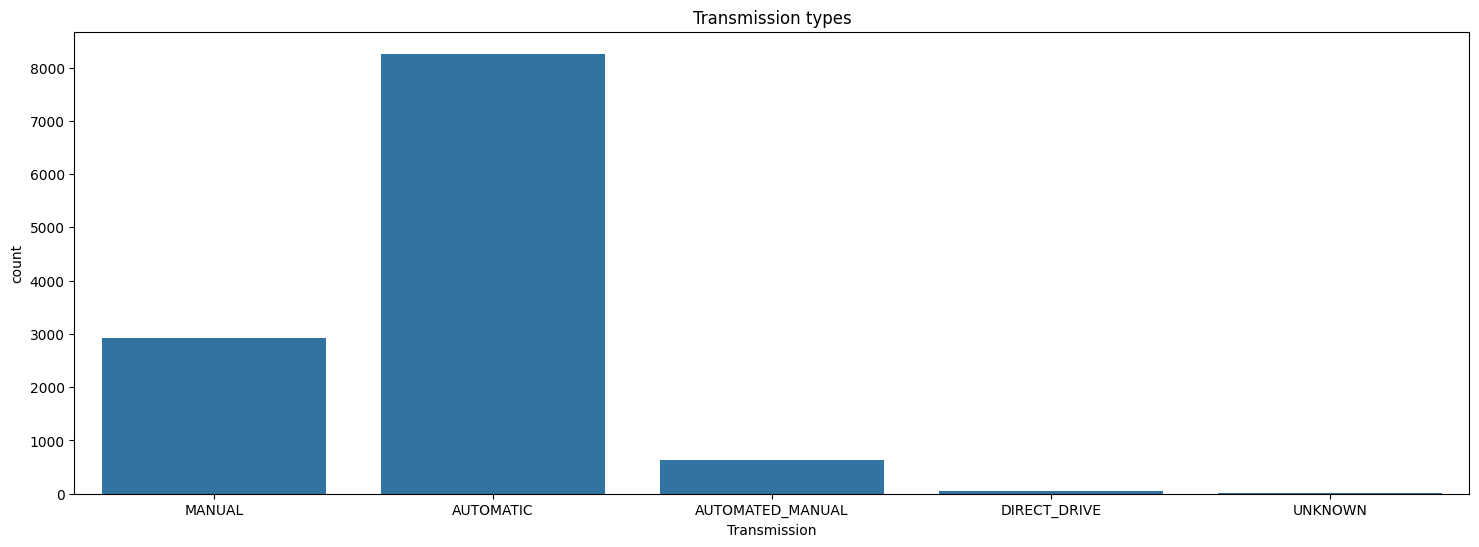

In [189]:
# Hitung kemunculan setiap jenis transmisi dalam dataset
plt.figure(figsize=(18, 6))
sns.countplot(x='Transmission', data=df)
plt.title('Transmission types')
plt.show()

In [190]:
# menghitung jumlah baris dalam DataFrame df di mana kolom Transmission memiliki nilai 'UNKNOWN'
df[df['Transmission'] == 'UNKNOWN'].shape

(19, 14)

In [191]:
# Hapus baris yang jenis Transmisinya tidak diketahui
df = df[df['Transmission'] != 'UNKNOWN']

In [192]:
# mendapatkan ukuran dari DataFrame terbaru
df.shape

(11865, 14)

In [193]:
# mendapatkan daftar nilai unik yang terdapat dalam kolom Fuel_Type
df['Fuel_Type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)'], dtype=object)

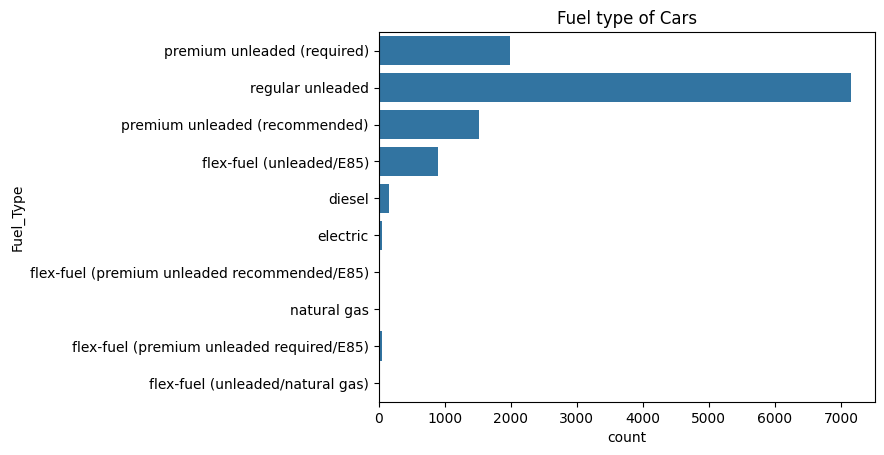

In [194]:
# Hitung kemunculan setiap jenis bahan bakar dalam kumpulan data
sns.countplot(y='Fuel_Type', data=df)
plt.title('Fuel type of Cars')
plt.show()

In [195]:
# menunjukkan berapa kali setiap jenis bahan bakar muncul dalam dataset
df['Fuel_Type'].value_counts()

,count
Fuel_Type,
regular unleaded,7153
premium unleaded (required),1992
premium unleaded (recommended),1523
flex-fuel (unleaded/E85),899
diesel,154
electric,56
flex-fuel (premium unleaded required/E85),54
flex-fuel (premium unleaded recommended/E85),26
flex-fuel (unleaded/natural gas),6


<Axes: ylabel='Frequency'>

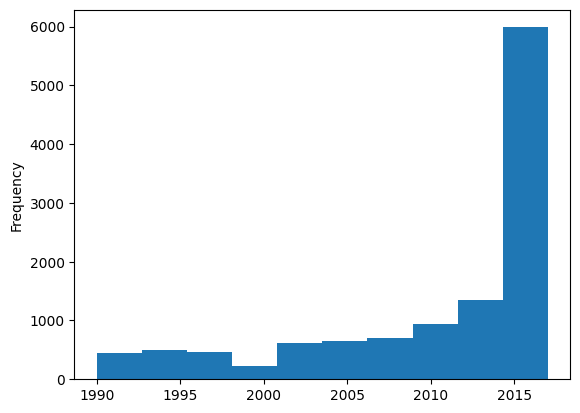

In [196]:
#visualisasi histogram yang menunjukkan sebaran tahun yang terdapat dalam kolom Year
df['Year'].plot(kind='hist')

In [197]:
# Hitung kemunculan setiap jenis drive dalam urutan menurun
drive_type = df['Drive_Type'].value_counts(ascending=False).reset_index()
drive_type

,Drive_Type,count
0,front wheel drive,4776
1,rear wheel drive,3335
2,all wheel drive,2353
3,four wheel drive,1401


In [198]:
# Hitung persentase distribusi jenis transmisi di seluruh merek mobil
pd.crosstab(df['Transmission'],df['Brand'],normalize='columns')*100

Brand,Acura,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,...,Rolls-Royce,Saab,Scion,Spyker,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo
Transmission,,,,,,,,,,,,,,,,,,,,,
AUTOMATED_MANUAL,8.333333,100.0,23.655914,36.890244,5.389222,0.0,100.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.402685,27.329193,0.000000
AUTOMATIC,68.253968,0.0,40.860215,42.682927,76.347305,100.0,0.0,100.0,97.229219,66.458519,...,100.0,54.954955,55.0,0.0,62.890625,62.678063,0.0,82.684564,37.515528,85.053381
DIRECT_DRIVE,0.000000,0.0,0.000000,0.000000,1.197605,0.0,0.0,0.0,0.000000,0.713649,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,100.0,0.268456,0.000000,0.000000
MANUAL,23.412698,0.0,35.483871,20.426829,17.065868,0.0,0.0,0.0,2.770781,32.827832,...,0.0,45.045045,45.0,100.0,37.109375,37.321937,0.0,16.644295,35.155280,14.946619


In [199]:
# Hitung persentase distribusi jenis penggerak di seluruh merek mobil
pd.crosstab(df['Drive_Type'],df['Brand'],normalize='columns')*100

Brand,Acura,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,...,Rolls-Royce,Saab,Scion,Spyker,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo
Drive_Type,,,,,,,,,,,,,,,,,,,,,
all wheel drive,27.380952,0.0,0.0,77.439024,43.113772,64.864865,100.0,23.979592,30.730479,4.549509,...,0.0,30.630631,0.0,0.0,86.328125,15.384615,61.111111,9.798658,8.322981,35.587189
four wheel drive,1.587302,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,9.068010,23.104371,...,0.0,0.000000,0.0,0.0,3.515625,17.378917,0.000000,25.771812,0.248447,0.000000
front wheel drive,69.444444,0.0,0.0,22.560976,0.299401,0.000000,0.0,69.387755,16.876574,34.076717,...,0.0,69.369369,80.0,0.0,5.468750,50.427350,0.000000,42.281879,90.310559,45.907473
rear wheel drive,1.587302,100.0,100.0,0.000000,56.586826,35.135135,0.0,6.632653,43.324937,38.269402,...,100.0,0.000000,20.0,100.0,4.687500,16.809117,38.888889,22.147651,1.118012,18.505338


In [200]:
# Periksa 10 Merek Mobil Teratas dengan Tenaga Kuda Tertinggi
top_hp = df.groupby('Brand')['Horsepower'].max().sort_values(ascending=False).reset_index().head(10)
top_hp

,Brand,Horsepower
0,Bugatti,1001.0
1,Lamborghini,750.0
2,Ferrari,731.0
3,Dodge,707.0
4,Ford,662.0
5,Chevrolet,650.0
6,McLaren,641.0
7,Mercedes-Benz,641.0
8,Cadillac,640.0
9,Maybach,631.0


<ipython-input-201-6863d406ef9c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.barplot(x='Brand', y = 'Horsepower', data=top_hp, palette = 'coolwarm')


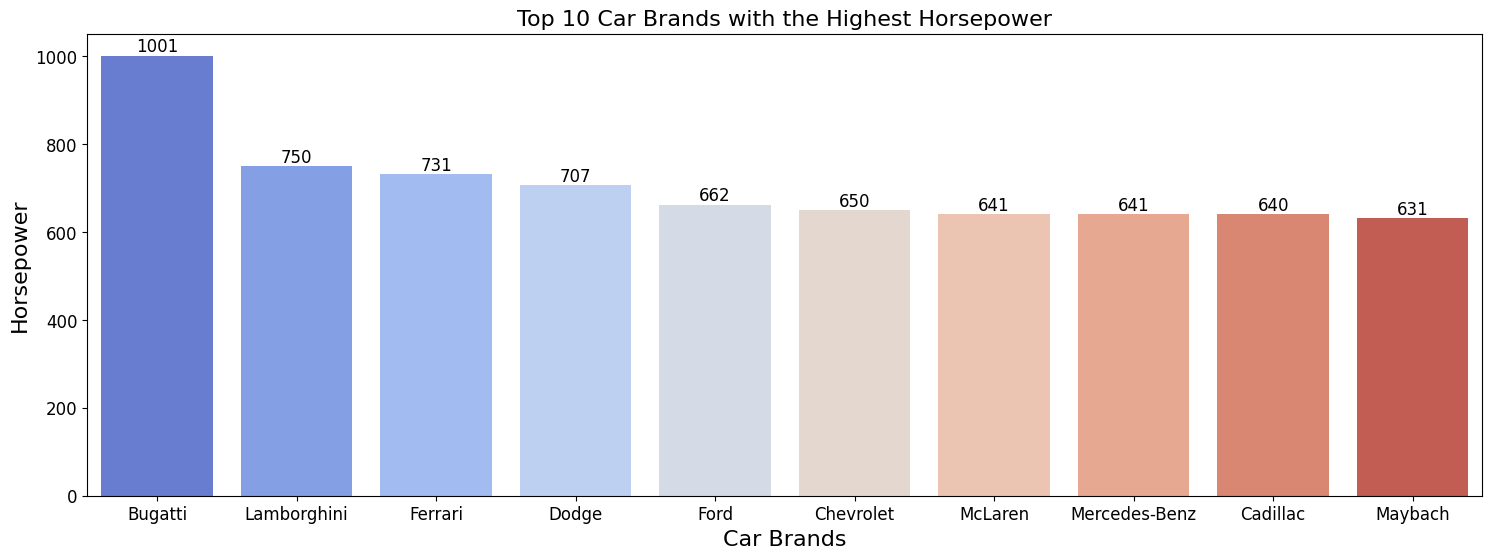

In [201]:
# Plot 10 Merek Mobil Teratas dengan Tenaga Kuda Tertinggi
plt.figure(figsize=(18, 6))
fig = sns.barplot(x='Brand', y = 'Horsepower', data=top_hp, palette = 'coolwarm')
plt.title('Top 10 Car Brands with the Highest Horsepower', fontsize = 16)
plt.xlabel('Car Brands', fontsize = 16)
plt.ylabel('Horsepower', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

for i in fig.containers:
    fig.bar_label(i, fontsize = 12)


plt.show()

Kita dapat melihat bahwa Bugatti, Lamborghini, dan Ferrari memimpin dalam hal tenaga kuda, menunjukkan dominasi mereka dalam kendaraan berperforma tinggi. Merek-merek mewah seperti Bentley, Rolls-Royce, dan Maybach juga membanggakan tenaga kuda yang mengesankan, yang mencerminkan komitmen mereka terhadap mobil yang bertenaga namun mewah. Di sisi lain, merek yang lebih terjangkau atau umum seperti Toyota, Honda, dan Tesla menawarkan kendaraan dengan tenaga kuda yang jauh lebih rendah, yang melayani konsumen sehari-hari yang berfokus pada efisiensi daripada tenaga yang ekstrem.

In [202]:
# Tentukan jenis bahan bakar kendaraan yang memiliki jumlah silinder terbanyak
fc = df.groupby(['Fuel_Type'])['Cylinders'].count().sort_values(ascending=False).reset_index()
fc

,Fuel_Type,Cylinders
0,regular unleaded,7153
1,premium unleaded (required),1992
2,premium unleaded (recommended),1523
3,flex-fuel (unleaded/E85),899
4,diesel,154
5,electric,56
6,flex-fuel (premium unleaded required/E85),54
7,flex-fuel (premium unleaded recommended/E85),26
8,flex-fuel (unleaded/natural gas),6
9,natural gas,2


<Axes: xlabel='Cylinders', ylabel='Fuel_Type'>

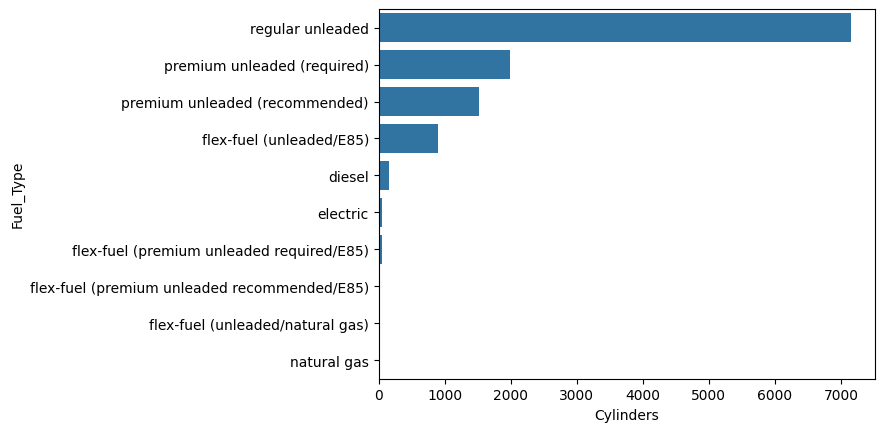

In [203]:
#plot batang yang menunjukkan rata-rata jumlah silinder untuk setiap jenis bahan bakar
sns.barplot(y = 'Fuel_Type', x='Cylinders', data = fc)

In [204]:
# Dapatkan 10 merek teratas berdasarkan popularitas menurut dataset
top_brands = df.groupby('Brand')['Popularity'].sum().reset_index().sort_values(by='Popularity', ascending=False).head(10)
top_brands

,Brand,Popularity
14,Ford,4983817
9,Chevrolet,1552585
45,Toyota,1513095
4,BMW,1307944
11,Dodge,1143918
33,Nissan,1121022
3,Audi,1018440
18,Honda,988698
46,Volkswagen,702765
8,Cadillac,644728


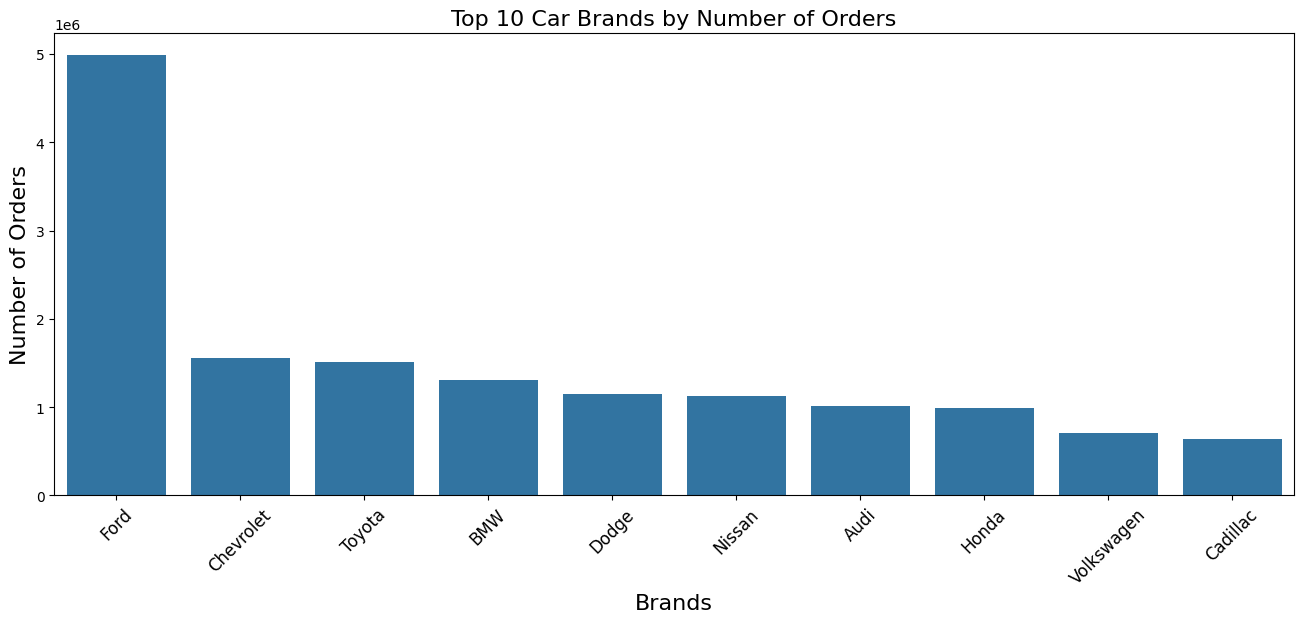

In [205]:
# Plot 10 Merek Mobil Teratas
plt.figure(figsize=(16, 6))
plt.xticks(rotation=45, fontsize=12)

fig = sns.barplot(data = top_brands, x='Brand', y= 'Popularity')
plt.xlabel('Brands', size=16)
plt.ylabel('Number of Orders', size=16)
plt.title('Top 10 Car Brands by Number of Orders', size=16)
plt.show()

In [206]:
# Periksa 10 Mobil Harga Tertinggi
top_price = df.groupby('Brand')['Price'].mean().sort_values(ascending=False).reset_index().head(10)
top_price

,Brand,Price
0,Bugatti,1.757224e+06
1,Maybach,5.462219e+05
2,Rolls-Royce,3.511306e+05
3,Lamborghini,3.315673e+05
4,Bentley,2.471693e+05
5,McLaren,2.398050e+05
6,Ferrari,2.382188e+05
7,Spyker,2.133233e+05
8,Aston Martin,1.979104e+05
9,Maserati,1.142077e+05


In [207]:
#menunjukkan persentase setiap jenis bahan bakar untuk setiap merek kendaraan
pd.crosstab(df['Fuel_Type'],df['Brand'],normalize='columns')*100

Brand,Acura,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,...,Rolls-Royce,Saab,Scion,Spyker,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo
Fuel_Type,,,,,,,,,,,,,,,,,,,,,
diesel,0.000000,0.0,0.0,8.536585,5.988024,0.000000,0.0,0.000000,0.000000,0.089206,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,8.571429,0.000000
electric,0.000000,0.0,0.0,0.000000,1.197605,0.000000,0.0,0.000000,0.000000,0.535236,...,0.0,0.000000,0.0,0.0,0.000000,0.0,100.0,0.268456,0.000000,0.000000
flex-fuel (premium unleaded recommended/E85),0.000000,0.0,0.0,1.524390,0.000000,0.000000,0.0,0.000000,2.267003,0.000000,...,0.0,10.810811,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
flex-fuel (premium unleaded required/E85),0.000000,0.0,0.0,0.000000,0.000000,32.432432,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
flex-fuel (unleaded/E85),0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,18.877551,11.586902,22.390723,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,8.724832,0.869565,0.000000
flex-fuel (unleaded/natural gas),0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.535236,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
natural gas,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
premium unleaded (recommended),57.936508,0.0,0.0,28.658537,8.083832,0.000000,0.0,14.795918,27.959698,7.582516,...,0.0,44.144144,0.0,0.0,5.859375,0.0,0.0,0.268456,47.080745,13.879004
premium unleaded (required),17.063492,100.0,100.0,45.426829,81.736527,67.567568,100.0,1.530612,10.579345,2.854594,...,100.0,6.306306,20.0,100.0,33.203125,0.0,0.0,1.342282,3.602484,1.779359


In [208]:
# Periksa 10 Tahun teratas berdasarkan popularitas menurut dataset
top_brands = df.groupby(['Year', 'Brand'])['Popularity'].sum().reset_index().sort_values(by='Popularity', ascending=False).head(10)
top_brands

,Year,Brand,Popularity
714,2017,Ford,922091
681,2016,Ford,899463
645,2015,Ford,780666
636,2015,BMW,403348
702,2016,Toyota,387921
673,2016,BMW,364188
732,2017,Toyota,353394
666,2015,Toyota,347301
707,2017,BMW,309364
660,2015,Nissan,307377


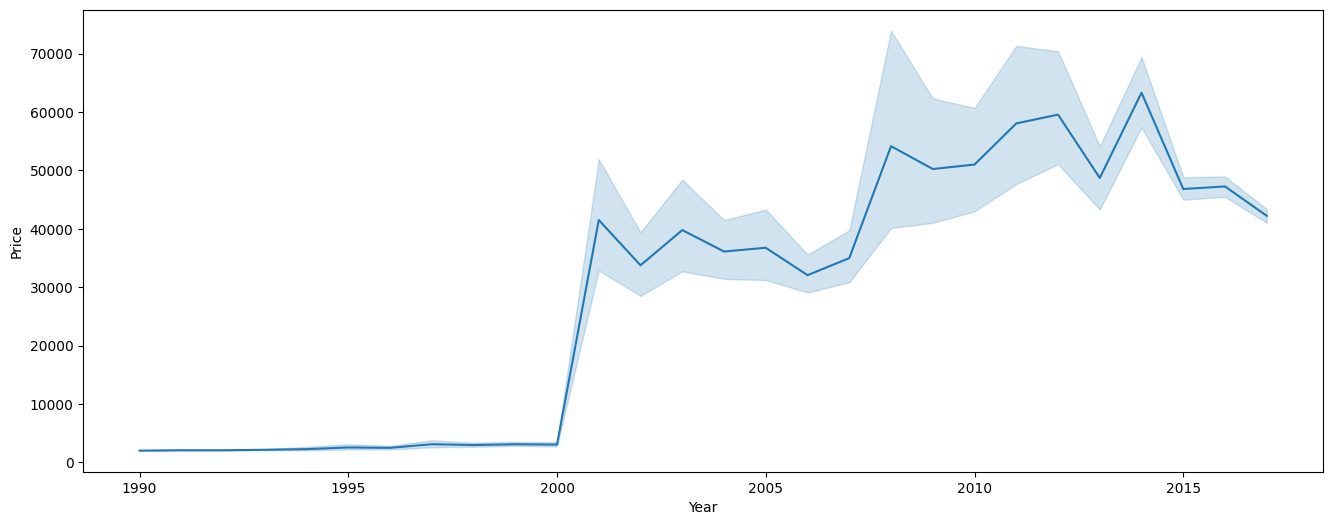

In [209]:
# Memeriksa hubungan Tahun dengan Harga

plt.figure(figsize=(16, 6))
sns.lineplot(x='Year',y='Price',data=df)
plt.show()

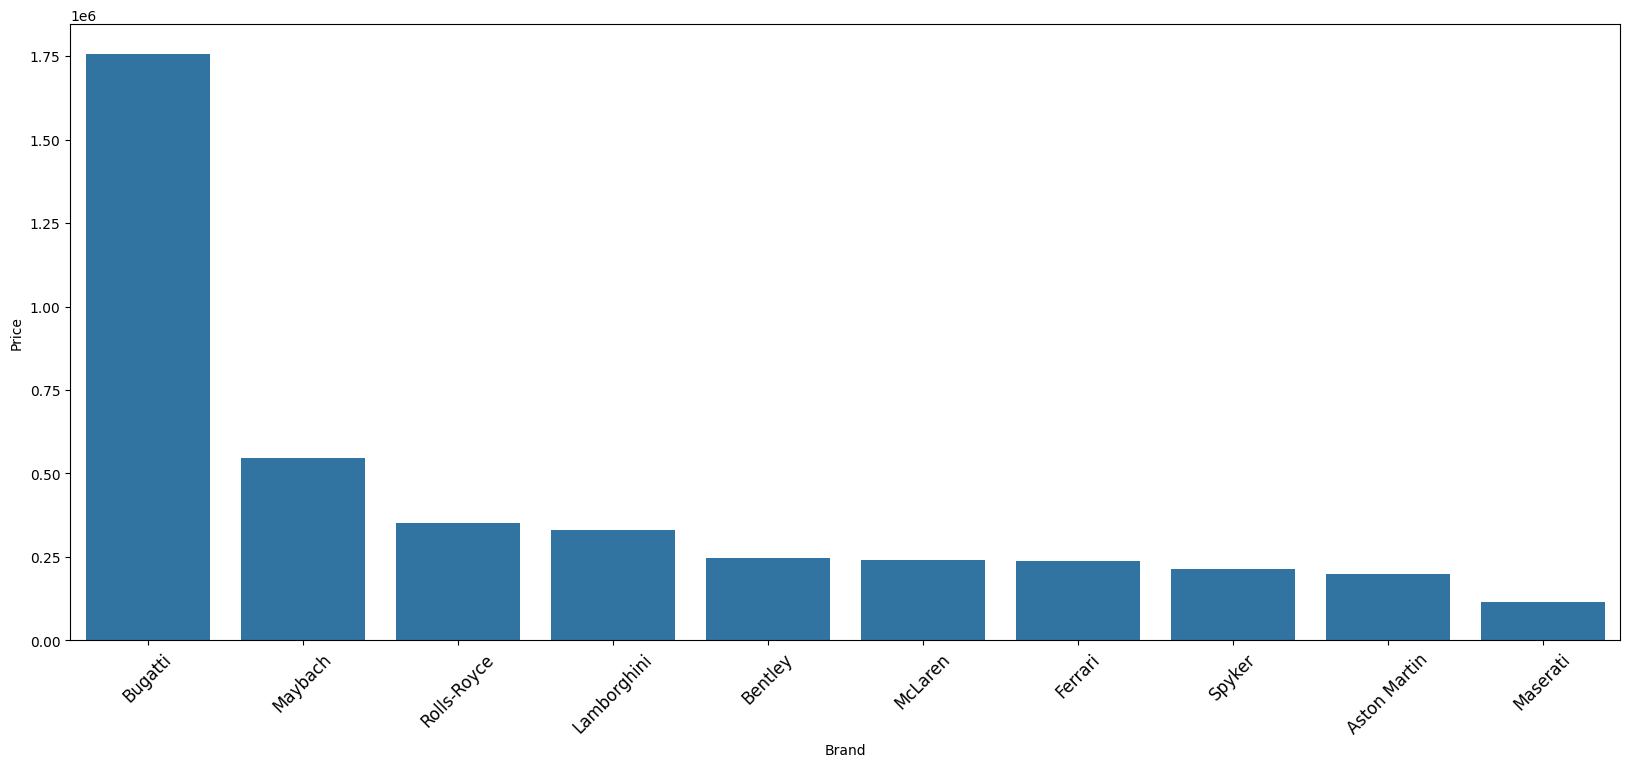

In [210]:
# Plot 10 mobil teratas dengan harga tertinggi
plt.figure(figsize=(20, 8))
plt.xticks(rotation=45, fontsize=12)
sns.barplot(x='Brand',y='Price',data=top_price)
plt.show()

In [211]:
# Buat tabulasi silang Drive_Type vs Brand, yang menunjukkan distribusi persentase untuk setiap merek.
pd.crosstab(df['Drive_Type'], df['Brand'], normalize = 'columns')*100

Brand,Acura,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,...,Rolls-Royce,Saab,Scion,Spyker,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo
Drive_Type,,,,,,,,,,,,,,,,,,,,,
all wheel drive,27.380952,0.0,0.0,77.439024,43.113772,64.864865,100.0,23.979592,30.730479,4.549509,...,0.0,30.630631,0.0,0.0,86.328125,15.384615,61.111111,9.798658,8.322981,35.587189
four wheel drive,1.587302,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,9.068010,23.104371,...,0.0,0.000000,0.0,0.0,3.515625,17.378917,0.000000,25.771812,0.248447,0.000000
front wheel drive,69.444444,0.0,0.0,22.560976,0.299401,0.000000,0.0,69.387755,16.876574,34.076717,...,0.0,69.369369,80.0,0.0,5.468750,50.427350,0.000000,42.281879,90.310559,45.907473
rear wheel drive,1.587302,100.0,100.0,0.000000,56.586826,35.135135,0.0,6.632653,43.324937,38.269402,...,100.0,0.000000,20.0,100.0,4.687500,16.809117,38.888889,22.147651,1.118012,18.505338


In [212]:
#Tabel pivot untuk 'Fuel_Type' vs 'Price'
df.pivot_table(values='Price', index='Fuel_Type', aggfunc='mean').sort_values(by='Price', ascending=False)

,Price
Fuel_Type,
flex-fuel (premium unleaded required/E85),159429.351852
premium unleaded (required),102240.693273
electric,50615.089286
flex-fuel (premium unleaded recommended/E85),48641.923077
premium unleaded (recommended),40812.831254
diesel,40788.000000
flex-fuel (unleaded/natural gas),39194.166667
flex-fuel (unleaded/E85),36258.260289
natural gas,28065.000000


In [213]:
# Tabel pivot untuk 'Drive_Type' vs 'Price'
pivot_drive_type_price = df.pivot_table(values='Price', index='Drive_Type', aggfunc='mean')
print(pivot_drive_type_price.sort_values(by='Price', ascending=False))

                          Price
Drive_Type                     
all wheel drive    58693.884828
rear wheel drive   55466.206897
four wheel drive   35358.955746
front wheel drive  23053.568049


In [214]:
# Tabel pivot untuk 'Vehicle_Size' dan 'Price'
df.pivot_table(values='Price', index='Vehicle_Size', aggfunc='mean').sort_values(by='Price', ascending=False)

,Price
Vehicle_Size,
Large,54040.418924
Midsize,39071.670254
Compact,34354.904842


In [215]:
# Tabel pivot untuk 'Vehicle_Style' dan 'Price'
df.pivot_table(values='Price', index='Vehicle_Style', aggfunc='mean').sort_values(by='Price', ascending=False)

,Price
Vehicle_Style,
Convertible,84422.618205
Coupe,77210.125315
4dr SUV,40418.100925
Sedan,39282.921562
Crew Cab Pickup,37220.466960
Passenger Van,29015.203125
Passenger Minivan,25621.050360
Wagon,25557.939189
Extended Cab Pickup,22488.776886


Tipe kendaraan Convertible dan Coupe memiliki harga rata-rata tertinggi masing-masing sebesar 84.422,62 dan 77.210,13, sementara SUV 2 pintu dan Van Kargo memiliki harga rata-rata terendah masing-masing sebesar 10.346,36 dan 15.280,22. Secara keseluruhan, SUV dan Sedan menunjukkan harga kisaran menengah antara 40.418,10 dan 39.282,92.

In [216]:
# menghitung rata-rata harga (Price) kendaraan berdasarkan kombinasi dari merek (Brand) dan tenaga kuda (Horsepower) dalam DataFrame
df.groupby(['Brand', 'Horsepower'])['Price'].mean().sort_values(ascending=False)

,,Price
Brand,Horsepower,
Bugatti,1001.0,1.757224e+06
Lamborghini,650.0,1.500000e+06
Maybach,620.0,7.545083e+05
Ferrari,660.0,6.433300e+05
Lamborghini,720.0,5.232250e+05
...,...,...
Oldsmobile,180.0,2.000000e+03
Ford,96.0,2.000000e+03
Oldsmobile,225.0,2.000000e+03


Dalam Analisis Data Eksplorasi (EDA) saya terhadap Fitur Mobil dan Dataset MSRP, saya menganalisis aspek-aspek utama data, seperti jenis transmisi, konfigurasi penggerak, tenaga kuda, dan harga.

Dataset berisi 11.914 baris dan 16 kolom, dengan sebagian besar baris memiliki nilai yang bukan nol. Empat kolom memiliki beberapa nilai yang hilang, dan ukuran dataset lebih dari 1,5 MB. Saya mengganti nama kolom untuk kejelasan yang lebih baik.

Satu pengamatan penting adalah distribusi jenis transmisi. Mayoritas mobil memiliki transmisi otomatis, tetapi ada beberapa baris dengan jenis transmisi yang tidak diketahui, yang saya hapus untuk menjaga integritas data. Transmisi otomatis dominan, terutama pada merek seperti Cadillac dan BMW, sementara transmisi manual kurang umum, lebih populer pada merek seperti Aston Martin dan Chevrolet. Jenis transmisi lainnya, seperti automated_manual dan direct_drive, jarang ditemukan, terlihat pada merek seperti Alfa Romeo dan Tesla.

Dalam hal jenis penggerak, penggerak semua roda umum digunakan pada merek seperti Audi, Subaru, dan Bentley, sementara penggerak roda depan lazim digunakan pada Buick, Toyota, dan Volkswagen. Penggerak roda belakang dominan digunakan pada merek mewah seperti Alfa Romeo, Aston Martin, dan Bugatti. Penggerak empat roda kurang umum, tetapi menonjol pada Chevrolet dan Buick.

Merek mewah seperti Bugatti, Lamborghini, dan Ferrari unggul dalam hal tenaga kuda, dengan Bugatti memiliki tenaga kuda tertinggi yaitu 1.001,0, dan Pontiac memiliki tenaga kuda terendah yaitu 74,0. Hal ini menyoroti fokus pada performa pada merek kelas atas dan efisiensi pada merek yang lebih terjangkau.

Dalam hal harga, tipe kendaraan Convertible dan Coupe memiliki harga rata-rata tertinggi masing-masing sebesar 84.422,62∗∗dan∗∗ 77.210,13, sementara SUV 2 pintu dan Van Kargo memiliki harga terendah sebesar 10.346,36∗∗dan∗∗ 15.280,22. SUV dan Sedan berada di kisaran tengah, dengan harga rata-rata sebesar 40.418,10∗∗dan∗∗ 39.282,92.

Secara keseluruhan, analisis tersebut mengungkapkan wawasan signifikan tentang bagaimana berbagai faktor seperti transmisi, jenis penggerak, dan tenaga kuda bervariasi di berbagai merek, serta bagaimana tipe kendaraan memengaruhi harga.

In [244]:
# Memisahkan fitur dan target variabel
X = df[['Horsepower', 'Year']]  # fitur yang akan digunakan
y = df['Price']  # variabel target

In [245]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [246]:
# Membuat model regresi linear biasa
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [247]:
# Memprediksi harga menggunakan model regresi linear biasa
y_pred_linear = linear_model.predict(X_test)

In [248]:
# Menghitung metrik untuk model regresi linear biasa
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Regresi Linear Biasa:")
print("RMSE:", rmse_linear)
print("MSE:", mse_linear)
print("R²:", r2_linear)

Regresi Linear Biasa:
RMSE: 42734.52081751611
MSE: 1826239269.5027175
R²: 0.4710222460540334


In [222]:
# Membuat model regresi linear dengan basis fungsi (Polynomial Regression)
poly = PolynomialFeatures(degree=2)  # Menggunakan derajat 2
X_poly = poly.fit_transform(X_train)

In [223]:
# Membuat dan melatih model regresi
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

LinearRegression()

In [224]:
# Mengubah data uji menjadi bentuk polynomial
X_test_poly = poly.transform(X_test)

In [225]:
# Memprediksi harga menggunakan model regresi polynomial
y_pred_poly = poly_model.predict(X_test_poly)

In [226]:
# Menghitung metrik untuk model regresi linear dengan basis fungsi
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("\nRegresi Linear dengan Basis Fungsi:")
print("RMSE:", rmse_poly)
print("MSE:", mse_poly)
print("R²:", r2_poly)


Regresi Linear dengan Basis Fungsi:
RMSE: 37399.69185385777
MSE: 1398736950.7635152
R²: 0.594850059938976


In [227]:
# Membandingkan hasil
print("\nPerbandingan Model:")
print(f"{'Model':<40}{'RMSE':<15}{'MSE':<15}{'R²'}")
print(f"{'Regresi Linear Biasa':<40}{rmse_linear:<15.2f}{mse_linear:<15.2f}{r2_linear:.2f}")
print(f"{'Regresi Linear dengan Basis Fungsi':<40}{rmse_poly:<15.2f}{mse_poly:<15.2f}{r2_poly:.2f}")


Perbandingan Model:
Model                                   RMSE           MSE            R²
Regresi Linear Biasa                    42734.52       1826239269.50  0.47
Regresi Linear dengan Basis Fungsi      37399.69       1398736950.76  0.59
